# Myopia Predictor

In [31]:
# Import dependencies
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

## Prepare the Data

In [2]:
# Loading data
file_path = Path("Resources/myopia.csv")
myopia = pd.read_csv(file_path)
myopia

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
# Check for any null values in the data
myopia.isnull().sum()

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [4]:
# Check for any duplicates in the data
myopia.duplicated().sum()

0

In [5]:
# Check unique values for 'MYOPIC' column
myopia['MYOPIC'].unique()

array([1, 0], dtype=int64)

In [6]:
# Set labels be used to color the t-SNE plot
labels = myopia['MYOPIC']

In [7]:
# Remove the "Myopic" column from the dataset
myopia_df = myopia.drop('MYOPIC', axis=1)
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [8]:
# Standardize the dataset using "StandardScaler" function and named the resulting DataFrame X _scaled
scaler = StandardScaler().fit(myopia_df)
X_scaled = scaler.transform(myopia_df)
print(X_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415 ]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415 ]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415 ]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897]]


# Part 2: Apply Dimentionality Reduction

### Use PCA to Reduce the Dimensions

In [9]:
# Initialize PCA model- we want to keep 90% of the variance in the original data after applying PCA, " so setting the hyperparameter "n_components" to 0.9 
pca = PCA(n_components=0.9)

# Get principal components for the X_scaled
myopia_pca = pca.fit_transform(X_scaled)

In [10]:
# Fetch the explained variance
pca.explained_variance_ratio_.sum()

0.9187361702915189

In [11]:
# Fetch the dimensions (rows/ columns) of dataset after reduction
myopia_pca.shape

(618, 10)

In [12]:
# Transform PCA data to a DataFrame
myopia_pca_df = pd.DataFrame(
    data=myopia_pca)
myopia_pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


### Use t-SNE to Further Reduce the Dimensions

In [13]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(myopia_pca_df)

C:\Users\meena\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


In [14]:
# Check the number of dimensions after further reduction 
tsne_features.shape

(618, 2)

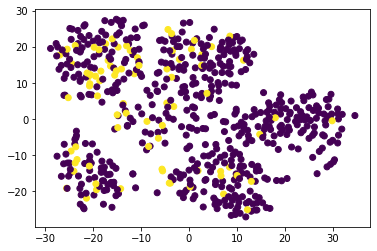

In [15]:
# Results colored by label
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

# Part 3: Perform a Cluster Analysis with K-means

C:\Users\meena\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


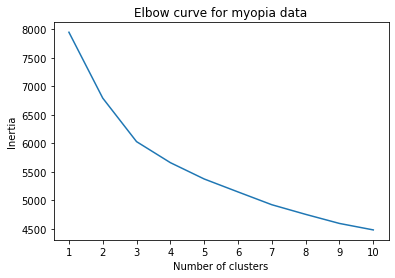

In [29]:
# Identify the best number of clusters using the elbow curve

inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve data 
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()

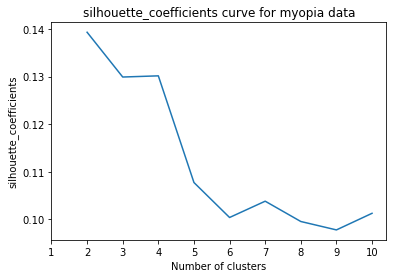

In [30]:
# Check the silhouette_coefficients for each k
silhouette_coefficients = []
k = list(range(2, 11))

# Calculate the silhouette_coefficients for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca_df)
    score = silhouette_score(myopia_pca_df, km.labels_)
    silhouette_coefficients .append(score)

# Create the df_silhouette data for plot
silhouette_coefficients_data = {"k": k, "silhouette_coefficients": silhouette_coefficients}
df_silhouette = pd.DataFrame(silhouette_coefficients_data)
df_silhouette

# Plot the silhouette_coefficients for each k
plt.plot(df_silhouette['k'], df_silhouette['silhouette_coefficients'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_coefficients')
plt.title('silhouette_coefficients curve for myopia data')
plt.show()

# Step 4: Conclusion
K means clustering does NOT seem to be a good model to cluster the paitients as myopic/ non-myopic using this dataset. This conclusion is based on the following observations:
    * The tNSE scatter plot clusters are overlapping and there may be anywhere from 2-5 poorly defined clusters.
    * The elbow curve does not show a sharp bend at any point. It does show very shallow bends at 2, 3, 5 cluster numbers.
    * To further confirm, checked the silhouette_coefficients for each k value (the best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters). Since the silhouette_coefficients for all the k values are very close to 0, this confirms the overlapping clusters seen with tNSE scatter plot.
  